This notebook will show to you how to do KDE density plot univariate and bivariate using Scipy and Matplotlib

What is KDE density?

kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.

Kernel density estimation is a fundamental data smoothing problem where inferences about the population are made, based on a finite data sample.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.graph_objs import *
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
setosa = df.loc[df.Species == 'Iris-setosa']
virginica = df.loc[df.Species == 'Iris-virginica']
versicolor = df.loc[df.Species == 'Iris-versicolor']

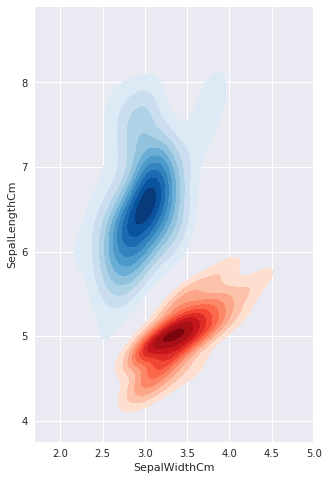

In [5]:
f, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal")

# Draw the two density plots
ax = sns.kdeplot(setosa.SepalWidthCm, setosa.SepalLengthCm,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.SepalWidthCm, virginica.SepalLengthCm,
                 cmap="Blues", shade=True, shade_lowest=False)

plt.show()

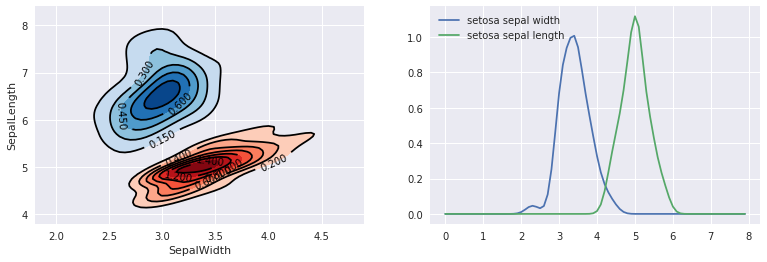

In [6]:
x_min, x_max = setosa.SepalWidthCm.min() - 0.5, setosa.SepalWidthCm.max() + 0.5
y_min, y_max = setosa.SepalLengthCm.min() - 0.5, virginica.SepalLengthCm.max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))
positions_setosa = np.vstack([xx.ravel(), yy.ravel()])
values_setosa = np.vstack([setosa.SepalWidthCm, setosa.SepalLengthCm])
kernel_setosa = st.gaussian_kde(values_setosa)
f_setosa = np.reshape(kernel_setosa(positions_setosa).T, xx.shape)
positions_virginica = np.vstack([xx.ravel(), yy.ravel()])
values_virginica = np.vstack([virginica.SepalWidthCm, virginica.SepalLengthCm])
kernel_virginica = st.gaussian_kde(values_virginica)
f_virginica = np.reshape(kernel_virginica(positions_virginica).T, xx.shape)

plt.figure(figsize=(13,4))
plt.subplot(1, 2, 1)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

cfset_setosa = plt.contourf(xx, yy, f_setosa, cmap='Reds')
cset_setosa = plt.contour(xx, yy, f_setosa, colors='k')
cfset_setosa.collections[0].set_alpha(0)
plt.clabel(cset_setosa, inline=1, fontsize=10)

cfset_virginica = plt.contourf(xx, yy, f_virginica, cmap='Blues')
cset_virginica = plt.contour(xx, yy, f_virginica, colors='k')
cfset_virginica.collections[0].set_alpha(0)
plt.clabel(cset_virginica, inline=1, fontsize=10)


plt.xlabel('SepalWidth')
plt.ylabel('SepalLength')

plt.subplot(1, 2, 2)
density = st.gaussian_kde(setosa.SepalWidthCm)
density2 = st.gaussian_kde(setosa.SepalLengthCm)
x = np.arange(0., 8, .1)
plt.plot(x, density(x), label = 'setosa sepal width')
plt.plot(x, density2(x), label = 'setosa sepal length')
plt.legend()
plt.show()

plt.show()